In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("D:\chrome download\quora_train.csv")

In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
df.shape

(404290, 6)

In [5]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.duplicated().sum()

0

is_duplicate
0    255024
1    149263
Name: count, dtype: int64
is_duplicate
0    63.079941
1    36.920059
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

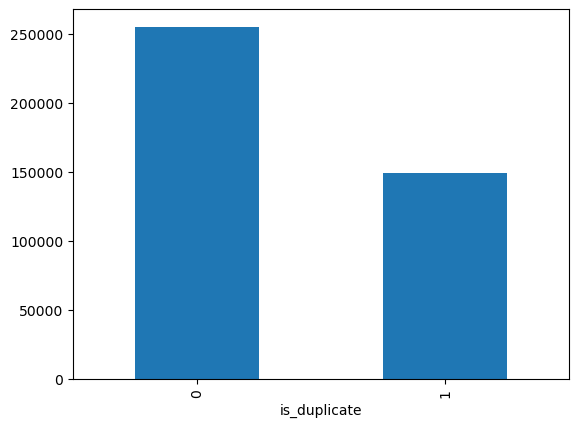

In [8]:
print(df["is_duplicate"].value_counts())
print((df["is_duplicate"].value_counts()/df["is_duplicate"].count())*100)
df["is_duplicate"].value_counts().plot(kind='bar')

In [9]:
# repeated question pair

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('number of unique question',np.unique(qid).shape[0])
x = qid.value_counts() > 1
print('Number of questions getting repeated',x[x].shape[0])

number of unique question 537929
Number of questions getting repeated 111778


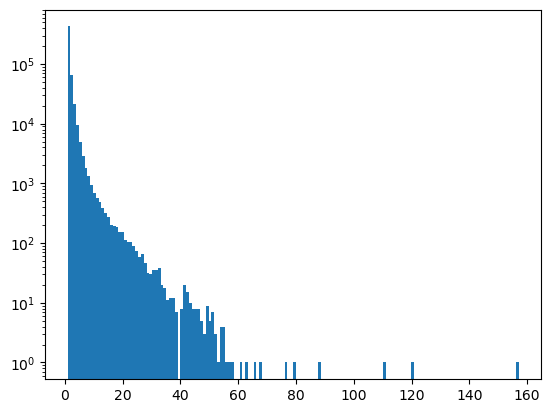

In [10]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [11]:
new_df = df.sample(30000,random_state=2)

In [12]:
from bs4 import BeautifulSoup
import re

In [13]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    #replace certain special character with their string equivalents
    
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # the pattern '[math]' appears around 900 times in the whole dataset
    q = q.replace('[math]', '')
    
    # replacing some numbers with string equivalent
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    #Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }
    
    q_decontracted = []
    
    for word in q.split():
        if word in contractions:
            word = contractions[word]
            
        q_decontracted.append(word)
        
    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    #removeing html tags
    q=BeautifulSoup(q)
    q = q.get_text()

    #remove punctuations
    
    pattern = re.compile('\W')
    q = re.sub(pattern,' ',q).strip()
    
    return q

In [14]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [15]:
import nltk

In [16]:
def stem(q):
    y=[]
    q = nltk.word_tokenize(q)
    for i in q:
        y.append(ps.stem(i)) 
    return " ".join(y)

In [17]:
new_df['question1'] = new_df['question1'].apply(stem)
new_df['question2'] = new_df['question2'].apply(stem)

In [18]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

C:\Users\DELL\AppData\Local\Temp\ipykernel_7132\2773293496.py:162: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  q=BeautifulSoup(q)
C:\Users\DELL\AppData\Local\Temp\ipykernel_7132\2773293496.py:162: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  q=BeautifulSoup(q)


In [19]:
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [20]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
331535,331535,169053,295926,how can i learn norwegian,what is the quickest way to learn norwegian,1,25,43
45407,45407,81383,81384,how are currenc rate determin,where and how are exchang rate determin,1,29,39
286200,286200,285024,406729,what is substitut,what is a substitut for caciocavallo,0,17,36
157195,157195,245856,245857,how can i make iphon 4s faster with io 9 2,i have an iphon 4s how do i make it faster a...,1,42,68
154346,154346,242075,242076,how can i help my girlfriend cope with her par...,what can i do to help my girlfriend through he...,1,56,61


In [21]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))

In [22]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
331535,331535,169053,295926,how can i learn norwegian,what is the quickest way to learn norwegian,1,25,43,5,8
45407,45407,81383,81384,how are currenc rate determin,where and how are exchang rate determin,1,29,39,5,7
286200,286200,285024,406729,what is substitut,what is a substitut for caciocavallo,0,17,36,3,6
157195,157195,245856,245857,how can i make iphon 4s faster with io 9 2,i have an iphon 4s how do i make it faster a...,1,42,68,11,18
154346,154346,242075,242076,how can i help my girlfriend cope with her par...,what can i do to help my girlfriend through he...,1,56,61,11,12


In [23]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
    return len(w1 & w2)

In [24]:
new_df['word_common'] = new_df.apply(common_words, axis=1)

In [25]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
331535,331535,169053,295926,how can i learn norwegian,what is the quickest way to learn norwegian,1,25,43,5,8,2
45407,45407,81383,81384,how are currenc rate determin,where and how are exchang rate determin,1,29,39,5,7,4
286200,286200,285024,406729,what is substitut,what is a substitut for caciocavallo,0,17,36,3,6,3
157195,157195,245856,245857,how can i make iphon 4s faster with io 9 2,i have an iphon 4s how do i make it faster a...,1,42,68,11,18,6
154346,154346,242075,242076,how can i help my girlfriend cope with her par...,what can i do to help my girlfriend through he...,1,56,61,11,12,8


In [26]:
def total_words(row):
    w1 = set(map(lambda word : word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word : word.lower().strip(), row['question2'].split(" ")))
    return len(w1) + len(w2)

In [27]:
new_df['word_total']=new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
331535,331535,169053,295926,how can i learn norwegian,what is the quickest way to learn norwegian,1,25,43,5,8,2,13
45407,45407,81383,81384,how are currenc rate determin,where and how are exchang rate determin,1,29,39,5,7,4,12
286200,286200,285024,406729,what is substitut,what is a substitut for caciocavallo,0,17,36,3,6,3,9
157195,157195,245856,245857,how can i make iphon 4s faster with io 9 2,i have an iphon 4s how do i make it faster a...,1,42,68,11,18,6,27
154346,154346,242075,242076,how can i help my girlfriend cope with her par...,what can i do to help my girlfriend through he...,1,56,61,11,12,8,23


In [28]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
331535,331535,169053,295926,how can i learn norwegian,what is the quickest way to learn norwegian,1,25,43,5,8,2,13,0.15
45407,45407,81383,81384,how are currenc rate determin,where and how are exchang rate determin,1,29,39,5,7,4,12,0.33
286200,286200,285024,406729,what is substitut,what is a substitut for caciocavallo,0,17,36,3,6,3,9,0.33
157195,157195,245856,245857,how can i make iphon 4s faster with io 9 2,i have an iphon 4s how do i make it faster a...,1,42,68,11,18,6,27,0.22
154346,154346,242075,242076,how can i help my girlfriend cope with her par...,what can i do to help my girlfriend through he...,1,56,61,11,12,8,23,0.35


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


minimum charecters 1
maximum charecters 307
average num of characters 54


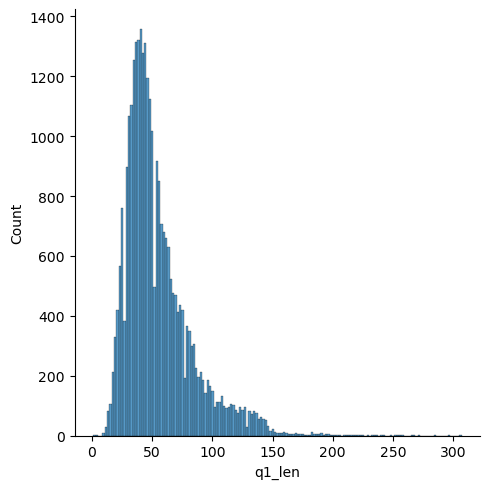

In [29]:
# analysis of features
sns.displot(new_df['q1_len'])
print('minimum charecters',new_df['q1_len'].min())
print('maximum charecters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


minimum characters 8
maximum characters 1134
average num of characters 55


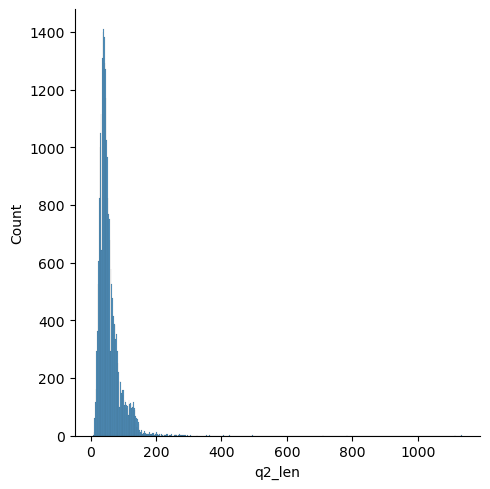

In [30]:
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

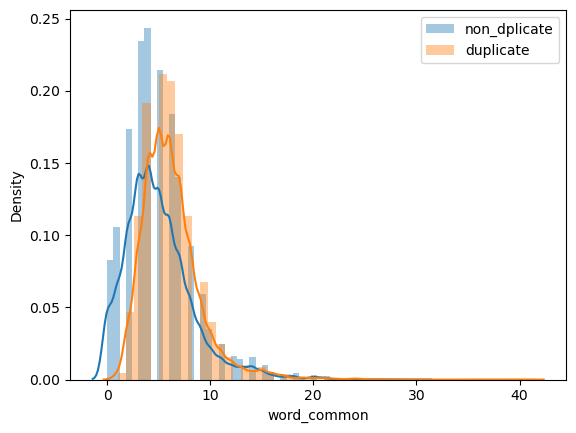

In [31]:
# common words
import warnings
warnings.filterwarnings('ignore')
sns.distplot(new_df[new_df['is_duplicate']==0]['word_common'],label='non_dplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_common'],label='duplicate')
plt.legend()
plt.show()

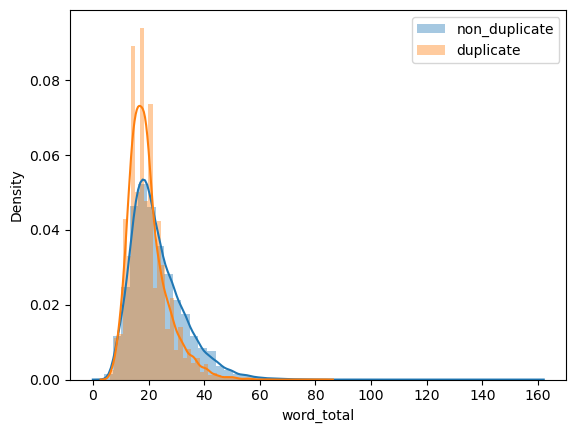

In [32]:
#total words
sns.distplot(new_df[new_df['is_duplicate']==0]['word_total'],label='non_duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_total'],label='duplicate')
plt.legend()
plt.show()

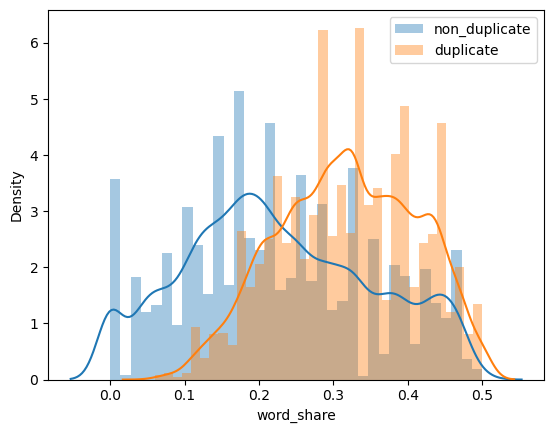

In [33]:
#word share
sns.distplot(new_df[new_df['is_duplicate']==0]['word_share'],label='non_duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [34]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
331535,331535,169053,295926,how can i learn norwegian,what is the quickest way to learn norwegian,1,25,43,5,8,2,13,0.15
45407,45407,81383,81384,how are currenc rate determin,where and how are exchang rate determin,1,29,39,5,7,4,12,0.33
286200,286200,285024,406729,what is substitut,what is a substitut for caciocavallo,0,17,36,3,6,3,9,0.33
157195,157195,245856,245857,how can i make iphon 4s faster with io 9 2,i have an iphon 4s how do i make it faster a...,1,42,68,11,18,6,27,0.22
154346,154346,242075,242076,how can i help my girlfriend cope with her par...,what can i do to help my girlfriend through he...,1,56,61,11,12,8,23,0.35


In [35]:
#advance features
from nltk.corpus import stopwords

def fetch_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001
    
    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    #converting the sentence into tokens:
    
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens)  == 0:
        return token_features
    
    #get the non-stopwords in question
    
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #getting the stopwords in question
    q1_stop = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stop = set([word for word in q2_tokens if word in STOP_WORDS])
    
    #getting the common non-stopwords in question
    common_word_count = len(q1_words.intersection(q2_words))
    
    #getting the common stopwords
    common_stop_count = len(q1_stop.intersection(q2_stop))
    
    #getting common tokens from question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stop), len(q2_stop)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stop), len(q2_stop)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens))+SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens))+SAFE_DIV)
    
    #last word of both question is some or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    #first word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [36]:
#import nltk
#nltk.download('stopwords')

In [37]:
token_featues = new_df.apply(fetch_features,axis=1)

new_df['cwc_min'] = list(map(lambda x : x[0],token_featues))
new_df['cwc_max'] = list(map(lambda x : x[1],token_featues))
new_df['csc_min'] = list(map(lambda x : x[2],token_featues))
new_df['csc_max'] = list(map(lambda x : x[3],token_featues))
new_df['ctc_min'] = list(map(lambda x : x[4],token_featues))
new_df['ctc_max'] = list(map(lambda x : x[5],token_featues))
new_df['last_word_eq'] = list(map(lambda x : x[6],token_featues))
new_df['first_word_eq'] = list(map(lambda x : x[7],token_featues))

In [38]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
331535,331535,169053,295926,how can i learn norwegian,what is the quickest way to learn norwegian,1,25,43,5,8,...,13,0.15,0.999950,0.499988,0.000000,0.000000,0.399992,0.249997,1,0
45407,45407,81383,81384,how are currenc rate determin,where and how are exchang rate determin,1,29,39,5,7,...,12,0.33,0.666644,0.666644,0.999950,0.499988,0.799984,0.571420,1,0
286200,286200,285024,406729,what is substitut,what is a substitut for caciocavallo,0,17,36,3,6,...,9,0.33,0.999900,0.499975,0.999950,0.499988,0.999967,0.499992,0,1
157195,157195,245856,245857,how can i make iphon 4s faster with io 9 2,i have an iphon 4s how do i make it faster a...,1,42,68,11,18,...,27,0.22,0.666656,0.571420,0.499988,0.222220,0.545450,0.374998,0,0
154346,154346,242075,242076,how can i help my girlfriend cope with her par...,what can i do to help my girlfriend through he...,1,56,61,11,12,...,23,0.35,0.999975,0.799984,0.666656,0.499994,0.727266,0.666661,1,0


In [39]:
#pip install Distance

In [40]:
import distance

In [41]:
def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    #converting the sequence into tokens:
    
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    #absolute length featues
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #average token length of both question
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [42]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [43]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
331535,331535,169053,295926,how can i learn norwegian,what is the quickest way to learn norwegian,1,25,43,5,8,...,0.499988,0.000000,0.000000,0.399992,0.249997,1,0,3,6.5,0.615385
45407,45407,81383,81384,how are currenc rate determin,where and how are exchang rate determin,1,29,39,5,7,...,0.666644,0.999950,0.499988,0.799984,0.571420,1,0,2,6.0,0.466667
286200,286200,285024,406729,what is substitut,what is a substitut for caciocavallo,0,17,36,3,6,...,0.499975,0.999950,0.499988,0.999967,0.499992,0,1,3,4.5,0.555556
157195,157195,245856,245857,how can i make iphon 4s faster with io 9 2,i have an iphon 4s how do i make it faster a...,1,42,68,11,18,...,0.571420,0.499988,0.222220,0.545450,0.374998,0,0,5,13.5,0.232558
154346,154346,242075,242076,how can i help my girlfriend cope with her par...,what can i do to help my girlfriend through he...,1,56,61,11,12,...,0.799984,0.666656,0.499994,0.727266,0.666661,1,0,1,11.5,0.350877


In [44]:
#pip install fuzzywuzzy

In [45]:
from fuzzywuzzy import fuzz

In [46]:
def fetch_fuzzy_features(row):
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    #fuzz ratio
    fuzzy_features[0] = fuzz.QRatio(q1,q2)
    
    #fuzz partial ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1,q2)
    
    #fuzz_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1,q2)
    
    #fuzz_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1,q2)
    
    return fuzzy_features

In [47]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

In [48]:
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [49]:
print(new_df.shape)
new_df.head()

(30000, 28)


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
331535,331535,169053,295926,how can i learn norwegian,what is the quickest way to learn norwegian,1,25,43,5,8,...,0.249997,1,0,3,6.5,0.615385,59,68,50,75
45407,45407,81383,81384,how are currenc rate determin,where and how are exchang rate determin,1,29,39,5,7,...,0.571420,1,0,2,6.0,0.466667,71,83,62,84
286200,286200,285024,406729,what is substitut,what is a substitut for caciocavallo,0,17,36,3,6,...,0.499992,0,1,3,4.5,0.555556,64,88,64,100
157195,157195,245856,245857,how can i make iphon 4s faster with io 9 2,i have an iphon 4s how do i make it faster a...,1,42,68,11,18,...,0.374998,0,0,5,13.5,0.232558,45,57,61,76
154346,154346,242075,242076,how can i help my girlfriend cope with her par...,what can i do to help my girlfriend through he...,1,56,61,11,12,...,0.666661,1,0,1,11.5,0.350877,80,80,77,86


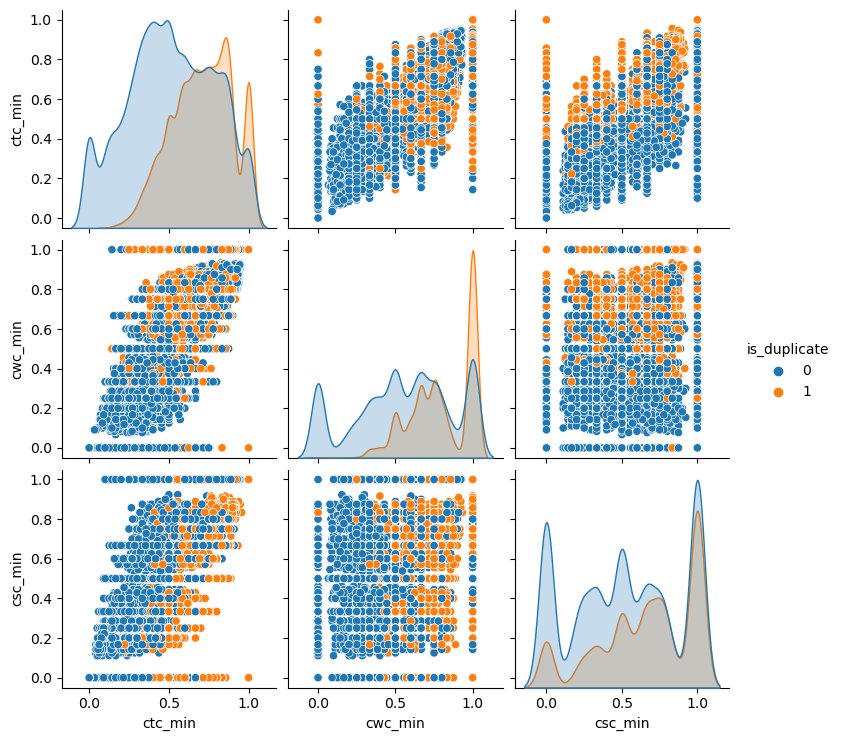

In [50]:
sns.pairplot(new_df[['ctc_min','cwc_min','csc_min','is_duplicate']],hue='is_duplicate')

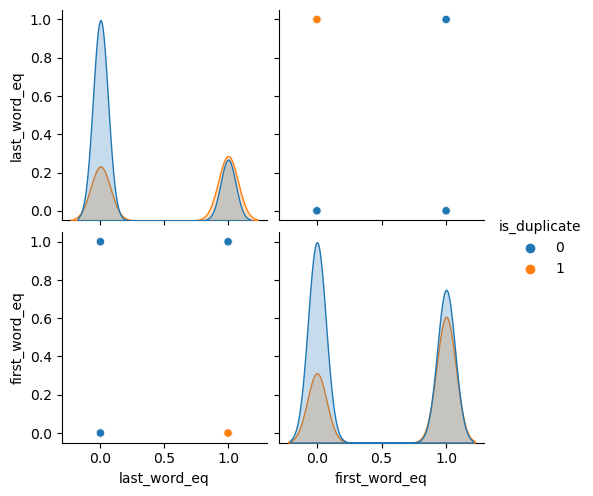

In [51]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

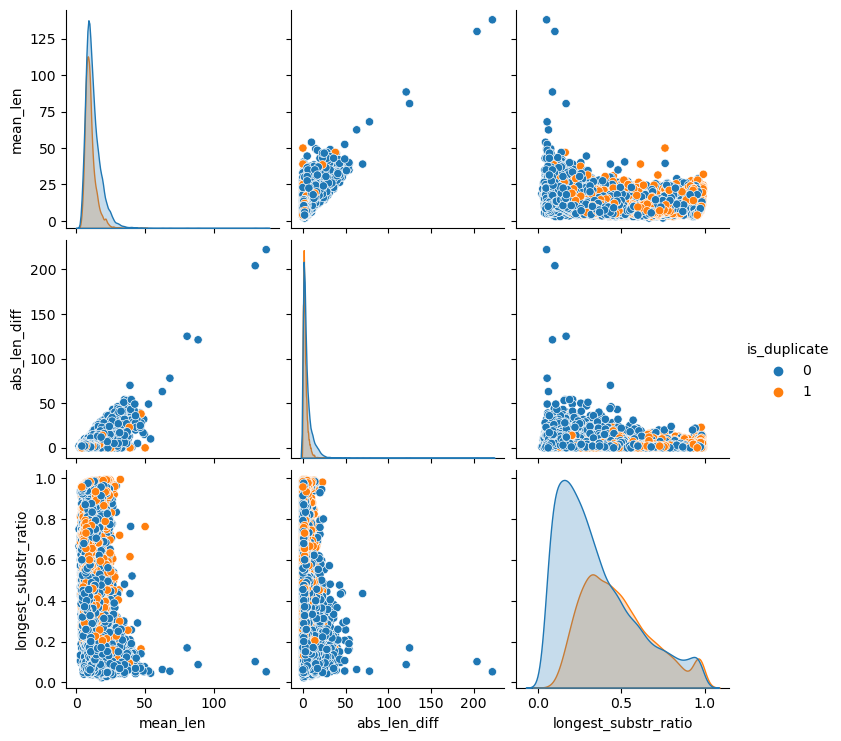

In [52]:
sns.pairplot(new_df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

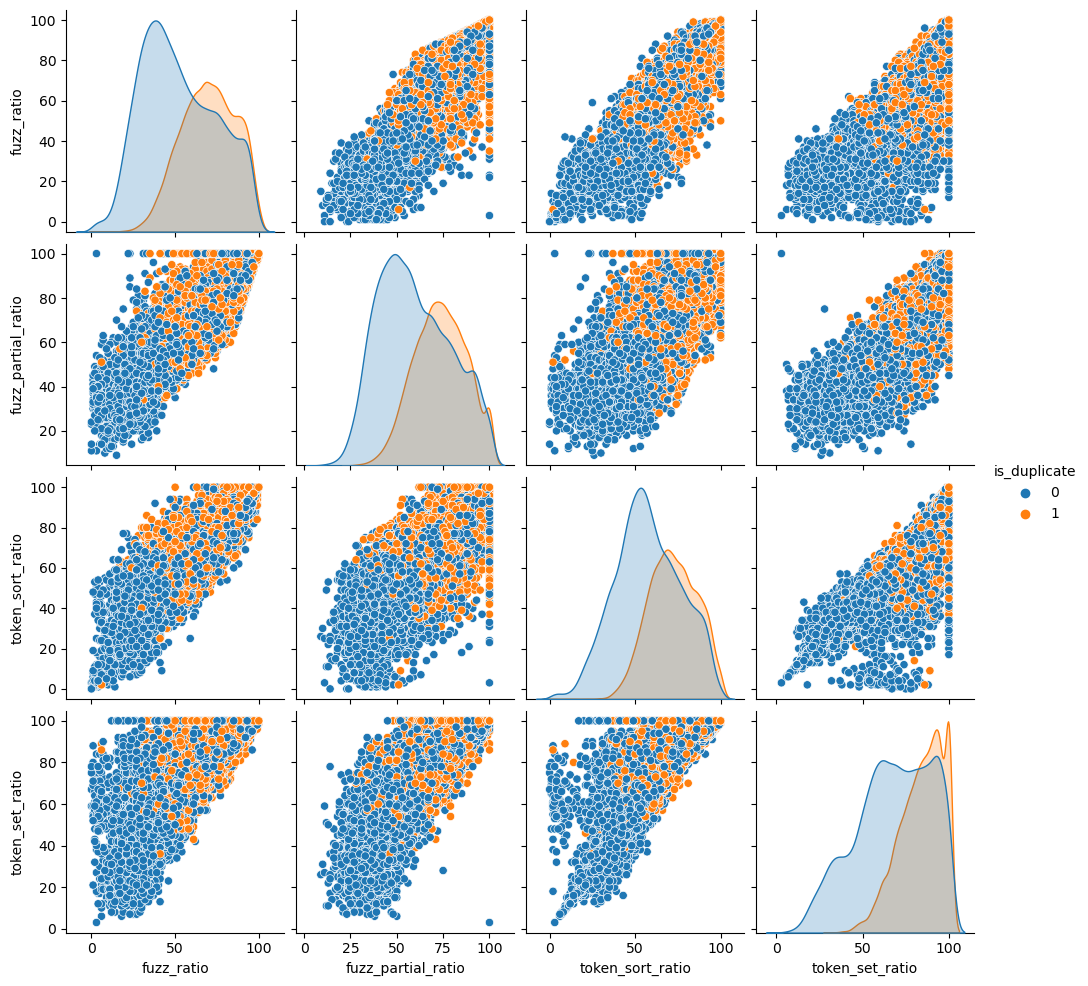

In [53]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

In [54]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
331535,how can i learn norwegian,what is the quickest way to learn norwegian
45407,how are currenc rate determin,where and how are exchang rate determin
286200,what is substitut,what is a substitut for caciocavallo
157195,how can i make iphon 4s faster with io 9 2,i have an iphon 4s how do i make it faster a...
154346,how can i help my girlfriend cope with her par...,what can i do to help my girlfriend through he...


In [55]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 23)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
331535,1,25,43,5,8,2,13,0.15,0.999950,0.499988,...,0.249997,1,0,3,6.5,0.615385,59,68,50,75
45407,1,29,39,5,7,4,12,0.33,0.666644,0.666644,...,0.571420,1,0,2,6.0,0.466667,71,83,62,84
286200,0,17,36,3,6,3,9,0.33,0.999900,0.499975,...,0.499992,0,1,3,4.5,0.555556,64,88,64,100
157195,1,42,68,11,18,6,27,0.22,0.666656,0.571420,...,0.374998,0,0,5,13.5,0.232558,45,57,61,76
154346,1,56,61,11,12,8,23,0.35,0.999975,0.799984,...,0.666661,1,0,1,11.5,0.350877,80,80,77,86


In [56]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
#merge texts
questions = list(ques_df['question1']) +list(ques_df['question2'])
tfidf = TfidfVectorizer(max_features=3000)
#cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(tfidf.fit_transform(questions).toarray(),2)

In [57]:
print(sklearn.__version__)

1.3.0


In [58]:
temp_df1 = pd.DataFrame(q1_arr, index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index=ques_df.index)
temp_df = pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(30000, 6000)

In [59]:
final_df = pd.concat([final_df,temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6023)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
331535,1,25,43,5,8,2,13,0.15,0.999950,0.499988,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45407,1,29,39,5,7,4,12,0.33,0.666644,0.666644,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
286200,0,17,36,3,6,3,9,0.33,0.999900,0.499975,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
157195,1,42,68,11,18,6,27,0.22,0.666656,0.571420,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154346,1,56,61,11,12,8,23,0.35,0.999975,0.799984,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [86]:
accuracy_score(y_test,y_pred)

0.784

In [87]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [88]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [89]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [90]:
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [91]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [92]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    # bow feature for q1
    q1_bow = tfidf.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = tfidf.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [93]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'

In [94]:
rf.predict(query_point_creator(q1,q2))

array([0], dtype=int64)

In [95]:
import pickle

In [96]:
pickle.dump(rf,open('model.pkl','wb'))

In [97]:
pickle.dump(tfidf,open('cv.pkl','wb'))

In [98]:
STOP_WORDS = stopwords.words("english")

In [99]:
pickle.dump(STOP_WORDS,open('stopwords.pkl','wb'))